# Graph Data Preprocessing: Techniques, Examples, and Comparison in Python
#### Graph data structures are widely used in applications such as social networks, recommendation systems, fraud detection, and molecular analysis. Preprocessing graph data is crucial for efficient storage, feature extraction, and machine learning applications.
#### 
#### 1️⃣ Graph Data Representation
#### Graph data is represented as nodes (vertices) and edges (connections between nodes).
#### Common formats include:
#### 
#### Adjacency List: Dictionary-based storage of neighbors.
#### Adjacency Matrix: Matrix representation where A[i][j] = 1 if there is an edge between node i and node j.
#### Edge List: Stores graph as a list of (node1, node2, weight).
#### 📌 Example: Graph Representation in Python (NetworkX)

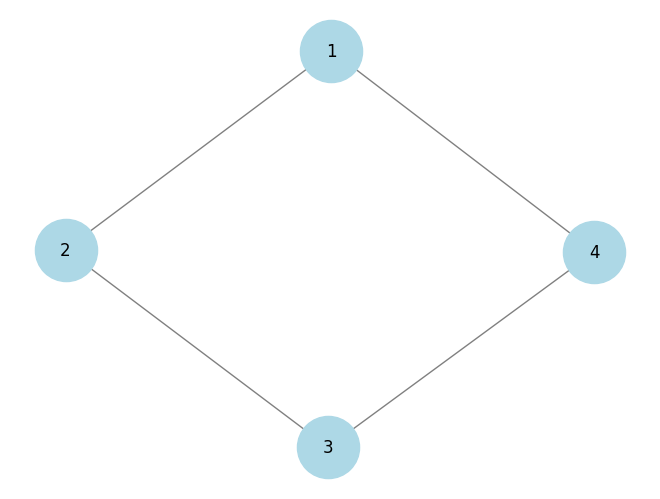

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4])

# Add edges (connections)
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000)
plt.show()



#### 2️⃣ Graph Cleaning & Normalization
#### Why?
#### Raw graph data may contain self-loops, duplicate edges, missing nodes, or disconnected components. Cleaning ensures a consistent structure.
#### 
#### 📌 Example: Removing Self-Loops and Isolated Nodes


In [2]:

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Remove isolated nodes (nodes with no connections)
G.remove_nodes_from(list(nx.isolates(G)))



#### 📌 Graph Normalization: Convert to Undirected Graph
#### Some algorithms work better with undirected graphs:
#### 


In [3]:
G = G.to_undirected()

#### 3️⃣ Graph Feature Engineering
#### Graph-based machine learning requires extracting meaningful features.
#### 
#### 🔹 Degree Centrality (Number of connections per node)

In [4]:
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)

{1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.6666666666666666}


#### 🔹 Node Embeddings (Graph Representation for ML)
#### Graph embeddings convert nodes into vector representations for machine learning models. Common methods include:
#### 
#### Node2Vec (random walk-based embedding)
#### Graph Neural Networks (GNNs)
#### 📌 Example: Node2Vec Embeddings

In [6]:
from node2vec import Node2Vec

# Train Node2Vec model
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get vector representation of node 1
node_embedding = model.wv[1]
print(node_embedding)

Computing transition probabilities:   0%|          | 0/4 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 3733.78it/s]


[-0.02422014  0.04038363  0.12533431  0.11410726 -0.06007215 -0.119527
  0.07449786  0.26166517  0.03135763 -0.04401523  0.1665313   0.10024224
  0.24541232  0.02396291 -0.22606866 -0.1098335  -0.11417197  0.20935833
  0.03944528 -0.02712652  0.09154487  0.09485248  0.30888247 -0.24214353
  0.05541652  0.21175894 -0.08304259  0.10015973  0.0334189   0.00711167
  0.02651892  0.07279377 -0.07693962 -0.158778    0.0214798   0.06093052
 -0.07728302  0.11385266  0.22521308 -0.10680413  0.04838568  0.01304948
 -0.18568851 -0.07834963  0.02632993  0.03055111 -0.05831195 -0.13569562
 -0.185661    0.15130801  0.04059577  0.15413675 -0.01762162  0.2030294
  0.08909671 -0.15033485  0.03659113 -0.14900285  0.10201829 -0.21584153
  0.0420687  -0.09800953 -0.17690586 -0.07846266]


#### 4️⃣ Graph Sampling
#### Large graphs can be computationally expensive. Sampling techniques reduce size while preserving structure:
#### 
#### Random Node Sampling: Selects random nodes and their neighbors.
#### Random Edge Sampling: Randomly selects edges.
#### Induced Subgraph Sampling: Selects a subset of nodes and retains their connections.
#### 📌 Example: Random Node Sampling


In [17]:

import random

# Sample 50% of the nodes randomly
num_nodes = int(0.5 * G.number_of_nodes())

sampled_nodes = random.sample(list(G.nodes()), num_nodes)

# Create a subgraph
G_sampled = G.subgraph(sampled_nodes)
G_sampled

#### 5️⃣ Graph Augmentation
#### Augmentation is used for data augmentation in graph-based deep learning models.
#### 
#### 🔹 Edge Addition / Deletion
#### python
#### Copy
#### Edit
#### G.add_edge(1, 3)  # Add new edge
#### G.remove_edge(1, 2)  # Remove an edge
#### 🔹 Feature Augmentation
#### Assigning node/edge features (e.g., categorical or numerical attributes).

In [18]:

nx.set_node_attributes(G, {1: {"feature": 0.5}, 2: {"feature": 0.8}})



#### 6️⃣ Graph Transformation (For ML Models)
#### Graph data is not directly usable in most ML models. Transformation methods include:
#### 
#### Method	Description	Use Cases
#### Adjacency Matrix	Convert graph to a matrix	Spectral clustering, GCNs
#### Node Embeddings (Node2Vec, DeepWalk)	Represent nodes as vectors	Graph classification, link prediction
#### Graph Convolutional Networks (GCN)	Uses deep learning for graph learning	Node classification, recommendation systems
#### 📌 Example: Convert Graph to Adjacency Matrix

In [22]:
import numpy as np

adj_matrix = nx.to_numpy_array(G)
print(adj_matrix)

[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]


#### 7️⃣ Graph Partitioning (For Large Graphs)
#### Splitting large graphs into smaller subgraphs:
#### 
#### Spectral Clustering (Using Laplacian matrix)
#### Min-Cut Partitioning (Divides graph by cutting minimal edges)
#### 📌 Example: Spectral Clustering for Graph Partitioning

In [23]:
from networkx.algorithms import community

# Spectral clustering-based partitioning
partition = community.greedy_modularity_communities(G)

# Print partitioned communities
for i, community in enumerate(partition):
    print(f"Community {i}: {community}")


Community 0: frozenset({1, 2, 3, 4})


#### Comparison of Graph Preprocessing Methods
#### Method	Purpose	Best For	Pros	Cons
#### Cleaning (Remove self-loops, isolates, etc.)	Ensure graph consistency	General graph processing	Improves accuracy	Can lose data
#### Feature Engineering (Degree, Embeddings)	Extract meaningful node properties	ML on graphs	Enables ML usage	Computationally heavy
#### Graph Sampling (Random Node/Edge Sampling)	Reduce graph size	Large-scale graphs	Speeds up training	May lose information
#### Graph Augmentation (Edge addition/deletion)	Data augmentation	GNNs, link prediction	Helps generalization	Can create noise
#### Graph Transformation (Adjacency matrix, Embeddings)	Convert graph for ML	Deep learning, Clustering	Makes ML possible	Computational cost
#### Graph Partitioning (Spectral Clustering)	Divide large graphs	Community detection	Preserves structure	Expensive for large graphs
#### 🔹 Final Summary
#### Graph preprocessing is essential for feature extraction and machine learning compatibility.
#### Graph feature engineering (degree, embeddings) provides rich representations.
#### Graph sampling & transformation help in handling large-scale graphs.
#### Graph partitioning & augmentation improve learning efficiency & generalization.
#### Would you like me to extend this with Graph Neural Networks (GNNs) for deep learning on graphs? 🚀